In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

100% 1.98G/1.98G [00:13<00:00, 188MB/s]
100% 1.98G/1.98G [00:13<00:00, 155MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/fruit-and-vegetable-image-recognition.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 3115 files belonging to 36 classes.


In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
#To avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [17]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [18]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=45)

Epoch 1/45
98/98 [==============================] - 71s 605ms/step - loss: 6.0642 - accuracy: 0.0392 - val_loss: 3.2517 - val_accuracy: 0.0997
Epoch 2/45
98/98 [==============================] - 64s 589ms/step - loss: 3.3584 - accuracy: 0.0841 - val_loss: 2.9926 - val_accuracy: 0.1652
Epoch 3/45
98/98 [==============================] - 63s 588ms/step - loss: 3.1764 - accuracy: 0.1124 - val_loss: 2.7676 - val_accuracy: 0.2678
Epoch 4/45
98/98 [==============================] - 63s 583ms/step - loss: 2.9241 - accuracy: 0.1647 - val_loss: 2.5579 - val_accuracy: 0.3219
Epoch 5/45
98/98 [==============================] - 68s 637ms/step - loss: 2.7788 - accuracy: 0.1961 - val_loss: 2.1439 - val_accuracy: 0.4701
Epoch 6/45
98/98 [==============================] - 63s 596ms/step - loss: 2.5846 - accuracy: 0.2543 - val_loss: 1.7987 - val_accuracy: 0.5527
Epoch 7/45
98/98 [==============================] - 66s 619ms/step - loss: 2.3685 - accuracy: 0.3111 - val_loss: 1.3898 - val_accuracy: 0.6980

In [20]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 [==============================] - 56s 514ms/step - loss: 0.0221 - accuracy: 0.9929
Training accuracy: 0.9929373860359192


In [21]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 [==============================] - 8s 156ms/step - loss: 0.3239 - accuracy: 0.9573
Validation accuracy: 0.9572649598121643


In [22]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
training_history.history #Return Dictionary of history

{'loss': [6.06415319442749,
  3.3584494590759277,
  3.1764254570007324,
  2.9240822792053223,
  2.778808116912842,
  2.584559440612793,
  2.3685290813446045,
  2.1123311519622803,
  1.9132832288742065,
  1.6477258205413818,
  1.467952013015747,
  1.3226300477981567,
  1.0567792654037476,
  0.851269006729126,
  0.8094635009765625,
  0.661423921585083,
  0.5221462845802307,
  0.4469079077243805,
  0.43571335077285767,
  0.4104377031326294,
  0.36986038088798523,
  0.38160309195518494,
  0.322218656539917,
  0.23554252088069916,
  0.251449853181839,
  0.20784419775009155,
  0.21777307987213135,
  0.2435564249753952,
  0.2223111242055893,
  0.1958680897951126,
  0.17731545865535736,
  0.180649995803833,
  0.24199989438056946,
  0.24969743192195892,
  0.17794105410575867,
  0.12973324954509735,
  0.21096661686897278,
  0.19231243431568146,
  0.1329183280467987,
  0.1668350100517273,
  0.19310323894023895,
  0.1434359848499298,
  0.26400163769721985,
  0.15448366105556488,
  0.11064908653497

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [26]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 95.72649598121643 %


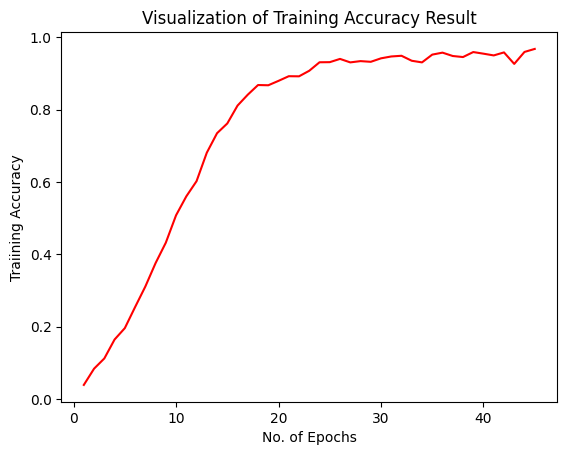

In [29]:
epochs = [i for i in range(1,46)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

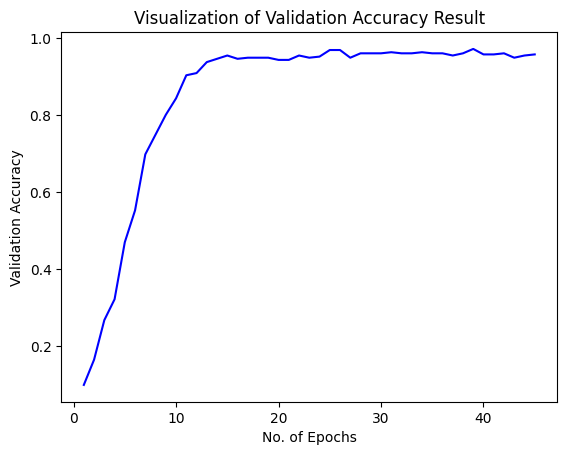

In [30]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [32]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 [==============================] - 9s 180ms/step - loss: 0.3167 - accuracy: 0.9582
Test accuracy: 0.9582172632217407
